In [1]:
import os
import pandas as pd
import numpy as np
import re
from nltk.tokenize import TweetTokenizer
import string

In [2]:
# loading tweets file into data frame 
DATA_FOLDER = os.getcwd()
TWEETS_FILE_RAW = os.path.join(DATA_FOLDER, "raw_tweets_classified copy.csv")
df = pd.read_csv(TWEETS_FILE_RAW, sep=";")
df = df.dropna()
#df.head(10)

In [3]:
# Lookig at basic statistics of data 
df.info()
print('\n')
df['Polarity'].value_counts() # print number of observation per class

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4903 entries, 0 to 4905
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4903 non-null   int64 
 1   Tweet       4903 non-null   object
 2   Polarity    4903 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.2+ KB




N     1950
0     1311
U      726
P      674
n      146
p       59
u       32
N        4
n        1
Name: Polarity, dtype: int64

In [4]:
''' Remove not needed column from raw tweet file tweetsFile.csv'''
dataset = df.drop(['Unnamed: 0'], axis=1)
print(dataset.head(10))

                                               Tweet Polarity
0    free real estate to take and neom becomes a hit        p
1      just give up dude nobody wants to go to saudi        n
2                                nobody gives a fuck        n
3                             sounds absolutely vile        n
4                                             cringe        n
5   neom sounds like a dystopian sci-fi city look...        p
6                   never-ending obnoxious marketing        n
7                       its a fancy smelling candle         n
8   the oligarchs of the world know they are driv...        n
9                                       nobody cares        n


In [5]:
# correct the classes in Polarity column. 'N' and 'N ' and 'n ' are in fact n => Negative
# correct the classes in Polarity column. 'P' is in fact p => Postive
# correct the classes in Polarity column. 'U' is in fact u => Neutral
# correct the classes in Polarity column. '0' is in fact u => spam
dataset['Polarity'] = dataset['Polarity'].replace('P', 'p')
dataset['Polarity'] = dataset['Polarity'].replace('U', 'n')
dataset['Polarity'] = dataset['Polarity'].replace('u', 'n')
#dataset['Polarity'] = dataset['Polarity'].replace('0', 'u')
dataset['Polarity'] = dataset['Polarity'].replace('N', 'n')
dataset['Polarity'] = dataset['Polarity'].replace('N ', 'n')
dataset['Polarity'] = dataset['Polarity'].replace('n ', 'n')

dataset = dataset[dataset['Polarity'] != '0']


<Axes: xlabel='Polarity', ylabel='count'>

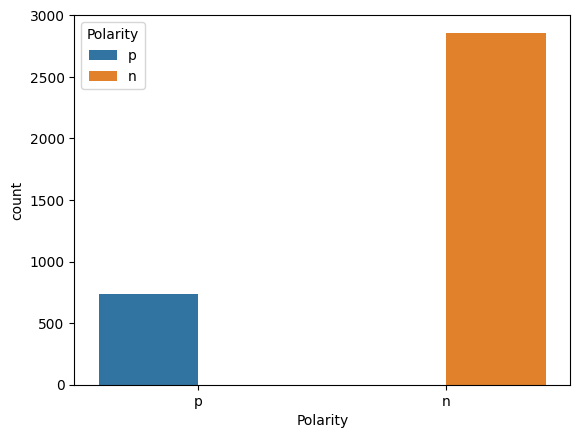

In [6]:
''' Examine the tweets file visually'''
import seaborn as sns
sns.countplot(x='Polarity', hue="Polarity", data=dataset)

In [7]:
''' Preprocessing the tweets '''
df_cleaning = dataset
# STEP 1 changing tweets to lower case
df_cleaning.Tweet = df_cleaning.Tweet.str.lower()
#print(df_cleaning)
# STEP 2 removing mentions
df_cleaning.Tweet = df_cleaning.Tweet.apply(lambda x: re.sub(r'@neom', '', str(x)))
#print(df_cleaning)
# STEP 3 removing URLs
df_cleaning.Tweet = df_cleaning.Tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
df_cleaning.Tweet = df_cleaning.Tweet.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
#print(df_cleaning)
# STEP 4 removing html characters e.g. &gt;
df_cleaning.Tweet = df_cleaning.Tweet.apply(lambda x: re.sub(r'&[a-z]+;', '', x))
#print(df_cleaning)
# STEP 5 removing  emojies
df_cleaning.Tweet = df_cleaning.Tweet.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
print(df_cleaning.head(10))



                                               Tweet Polarity
0    free real estate to take and neom becomes a hit        p
1      just give up dude nobody wants to go to saudi        n
2                                nobody gives a fuck        n
3                             sounds absolutely vile        n
4                                             cringe        n
5   neom sounds like a dystopian sci-fi city look...        p
6                   never-ending obnoxious marketing        n
7                       its a fancy smelling candle         n
8   the oligarchs of the world know they are driv...        n
9                                       nobody cares        n


In [8]:
# STEP 6 Tokenizing the tweets 
t_tokenizer = TweetTokenizer()
df_cleaning['tokenized_tweet'] = df_cleaning['Tweet'].apply(t_tokenizer.tokenize)
print(df_cleaning.head(10))
#df_cleaning.iloc[10:20][['Tweet', 'tokenized_tweet']]

                                               Tweet Polarity  \
0    free real estate to take and neom becomes a hit        p   
1      just give up dude nobody wants to go to saudi        n   
2                                nobody gives a fuck        n   
3                             sounds absolutely vile        n   
4                                             cringe        n   
5   neom sounds like a dystopian sci-fi city look...        p   
6                   never-ending obnoxious marketing        n   
7                       its a fancy smelling candle         n   
8   the oligarchs of the world know they are driv...        n   
9                                       nobody cares        n   

                                     tokenized_tweet  
0  [free, real, estate, to, take, and, neom, beco...  
1  [just, give, up, dude, nobody, wants, to, go, ...  
2                           [nobody, gives, a, fuck]  
3                         [sounds, absolutely, vile]  
4        

In [9]:
# STEP 7 Removing punctuations
l = list(string.punctuation) # list of punctuations in English
def removePunctuation(tweet_tokens):
    return [word for word in tweet_tokens if word not in l]
df_cleaning['tokenized_tweet'] = df_cleaning['tokenized_tweet'].apply(removePunctuation)
df_cleaning.iloc[0:10][['Tweet', 'tokenized_tweet', 'Polarity']]

,Tweet,tokenized_tweet,Polarity
0,free real estate to take and neom becomes a hit,"[free, real, estate, to, take, and, neom, beco...",p
1,just give up dude nobody wants to go to saudi,"[just, give, up, dude, nobody, wants, to, go, ...",n
2,nobody gives a fuck,"[nobody, gives, a, fuck]",n
3,sounds absolutely vile,"[sounds, absolutely, vile]",n
4,cringe,[cringe],n
5,neom sounds like a dystopian sci-fi city look...,"[neom, sounds, like, a, dystopian, sci-fi, cit...",p
6,never-ending obnoxious marketing,"[never-ending, obnoxious, marketing]",n
7,its a fancy smelling candle,"[its, a, fancy, smelling, candle]",n
8,the oligarchs of the world know they are driv...,"[the, oligarchs, of, the, world, know, they, a...",n
9,nobody cares,"[nobody, cares]",n


In [10]:
# STEP 8 remove stopping words
from nltk.corpus import stopwords

stopwords_english = stopwords.words('english')
def removeStopWords(tweet_tokens):
    return [word for word in tweet_tokens if word not in stopwords_english]
df_cleaning['tokenized_tweet'] = df_cleaning['tokenized_tweet'].apply(removeStopWords)
df_cleaning.iloc[0:10][['Tweet', 'tokenized_tweet', 'Polarity']]

,Tweet,tokenized_tweet,Polarity
0,free real estate to take and neom becomes a hit,"[free, real, estate, take, neom, becomes, hit]",p
1,just give up dude nobody wants to go to saudi,"[give, dude, nobody, wants, go, saudi]",n
2,nobody gives a fuck,"[nobody, gives, fuck]",n
3,sounds absolutely vile,"[sounds, absolutely, vile]",n
4,cringe,[cringe],n
5,neom sounds like a dystopian sci-fi city look...,"[neom, sounds, like, dystopian, sci-fi, city, ...",p
6,never-ending obnoxious marketing,"[never-ending, obnoxious, marketing]",n
7,its a fancy smelling candle,"[fancy, smelling, candle]",n
8,the oligarchs of the world know they are driv...,"[oligarchs, world, know, driving, civilization...",n
9,nobody cares,"[nobody, cares]",n


In [11]:
# STEP 9 stemming words
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemTweet(tweet_tokens):
    stemmed_tweet = []
    for word in tweet_tokens:
        stemmedWord = stemmer.stem(word)
        stemmed_tweet.append(stemmedWord)
    return stemmed_tweet

df_cleaning['tokenized_tweet'] = df_cleaning['tokenized_tweet'].apply(stemTweet)
df_cleaning.iloc[500:510][['Tweet', 'tokenized_tweet', 'Polarity']]

,Tweet,tokenized_tweet,Polarity
1022,wownow that's amazing,"[wownow, that', amaz]",p
1024,scary,[scari],n
1027,what is the line,[line],n
1032,what a joke architecture for the blind,"[joke, architectur, blind]",n
1034,happy new year,"[happi, new, year]",n
1035,nice update,"[nice, updat]",p
1036,v mj;hh hop vc\nmi c,"[v, mj, hh, hop, vc, mi, c]",n
1037,when you find out please tell me,"[find, pleas, tell]",n
1038,: mark is real,"[mark, real]",n
1039,when will the line actually be completed,"[line, actual, complet]",n


In [12]:
def joinTokenizedTweets(tweet_tokens):    
    return ' '.join(tweet_tokens)

df_cleaning['clean_tweet'] = df_cleaning['tokenized_tweet'].apply(joinTokenizedTweets)
df_cleaning.iloc[0:10][['Tweet', 'tokenized_tweet', 'Polarity', 'clean_tweet']]

,Tweet,tokenized_tweet,Polarity,clean_tweet
0,free real estate to take and neom becomes a hit,"[free, real, estat, take, neom, becom, hit]",p,free real estat take neom becom hit
1,just give up dude nobody wants to go to saudi,"[give, dude, nobodi, want, go, saudi]",n,give dude nobodi want go saudi
2,nobody gives a fuck,"[nobodi, give, fuck]",n,nobodi give fuck
3,sounds absolutely vile,"[sound, absolut, vile]",n,sound absolut vile
4,cringe,[cring],n,cring
5,neom sounds like a dystopian sci-fi city look...,"[neom, sound, like, dystopian, sci-fi, citi, l...",p,neom sound like dystopian sci-fi citi look lik...
6,never-ending obnoxious marketing,"[never-end, obnoxi, market]",n,never-end obnoxi market
7,its a fancy smelling candle,"[fanci, smell, candl]",n,fanci smell candl
8,the oligarchs of the world know they are driv...,"[oligarch, world, know, drive, civil, collaps,...",n,oligarch world know drive civil collaps build ...
9,nobody cares,"[nobodi, care]",n,nobodi care


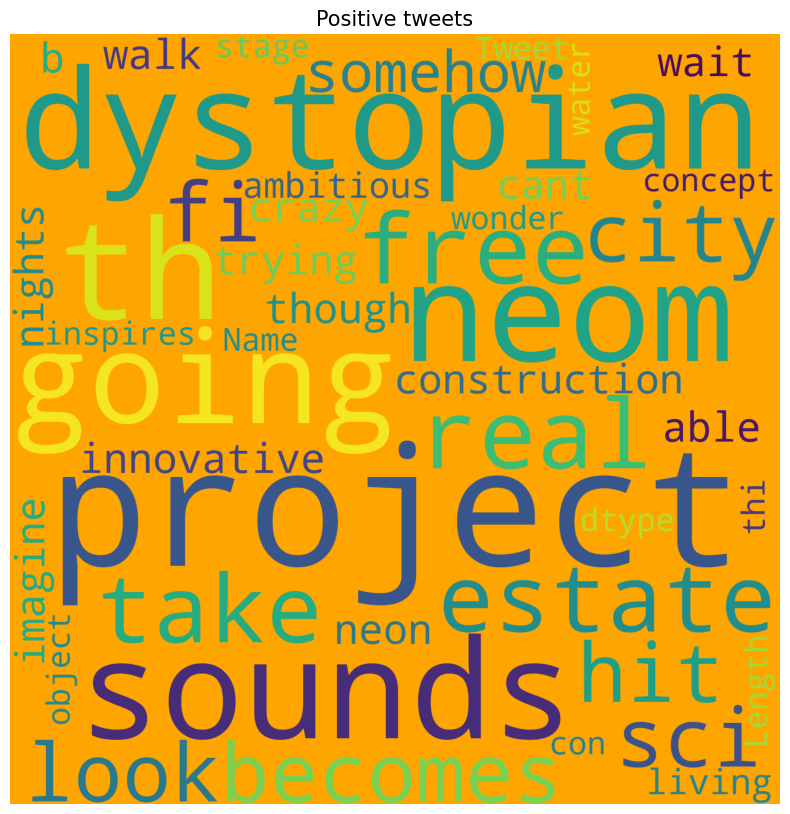

In [13]:
import matplotlib.pyplot as plt  
from wordcloud import WordCloud


positive = df_cleaning[df_cleaning['Polarity'] == 'p']
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fast')

wc = WordCloud(background_color= 'orange', width=1500, height=1500).generate(str(positive['Tweet']))
plt.title('Positive tweets', fontsize=15)
plt.imshow(wc)
plt.axis('off')
plt.show()

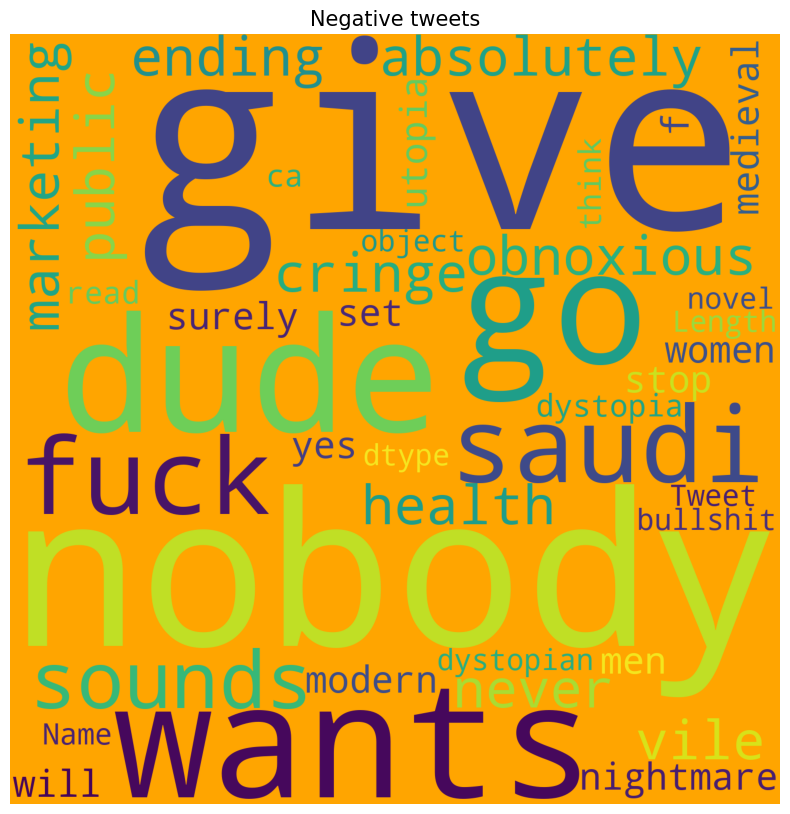

In [14]:
negative = df_cleaning[df_cleaning['Polarity'] == 'n']
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fast')

wc = WordCloud(background_color= 'orange', width=1500, height=1500).generate(str(negative['Tweet']))
plt.title('Negative tweets', fontsize=15)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
''' Split dataset to training and testing subsets
    80% training 
    20% testing
    spliting is random
'''
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(df_cleaning['clean_tweet'], df_cleaning['Polarity'], test_size=0.2, random_state=10, shuffle=df_cleaning['Polarity'])

In [16]:
''' Useing TF-IDF as feature selection method'''
tfidf = TfidfVectorizer(min_df=1, max_features=1900) # max feature must be set otherwise trainig and testing dimension will mismatch
XX_train = tfidf.fit_transform(X_train)
XX_test = tfidf.fit_transform(X_test)

print(XX_train.shape)
print(XX_test.shape)

(2873, 1900)
(719, 1900)


In [17]:
''' Import the notebook which contains evaluation function'''
''' It requires installing  {sys.executable} -m pip install import_ipynb  '''
import import_ipynb
import evaluation_functions

importing Jupyter notebook from evaluation_functions.ipynb


              precision    recall  f1-score   support

    Negative       0.80      0.94      0.87       569
    Positive       0.33      0.11      0.16       150

    accuracy                           0.77       719
   macro avg       0.56      0.52      0.51       719
weighted avg       0.70      0.77      0.72       719



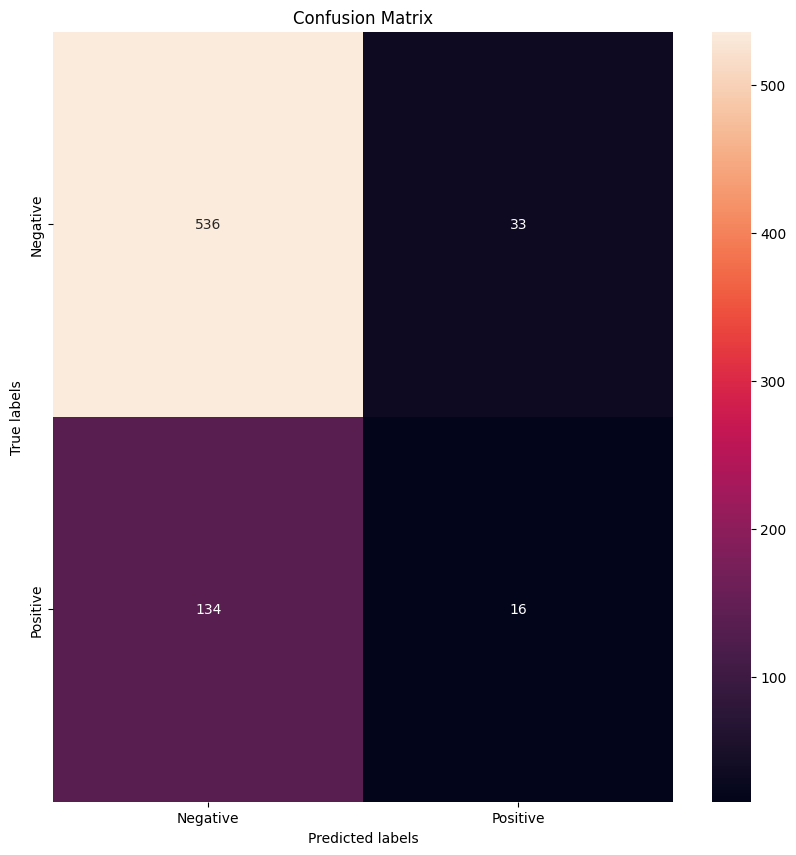

In [18]:
''' Building naive bayes'''
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(XX_train, y_train) # model training 
y_pred = nb_model.predict(XX_test)

# print classification report
evaluation_functions.classification_report_cm(nb_model, XX_test, y_test)


              precision    recall  f1-score   support

    Negative       0.79      1.00      0.88       569
    Positive       0.50      0.01      0.03       150

    accuracy                           0.79       719
   macro avg       0.65      0.50      0.45       719
weighted avg       0.73      0.79      0.70       719



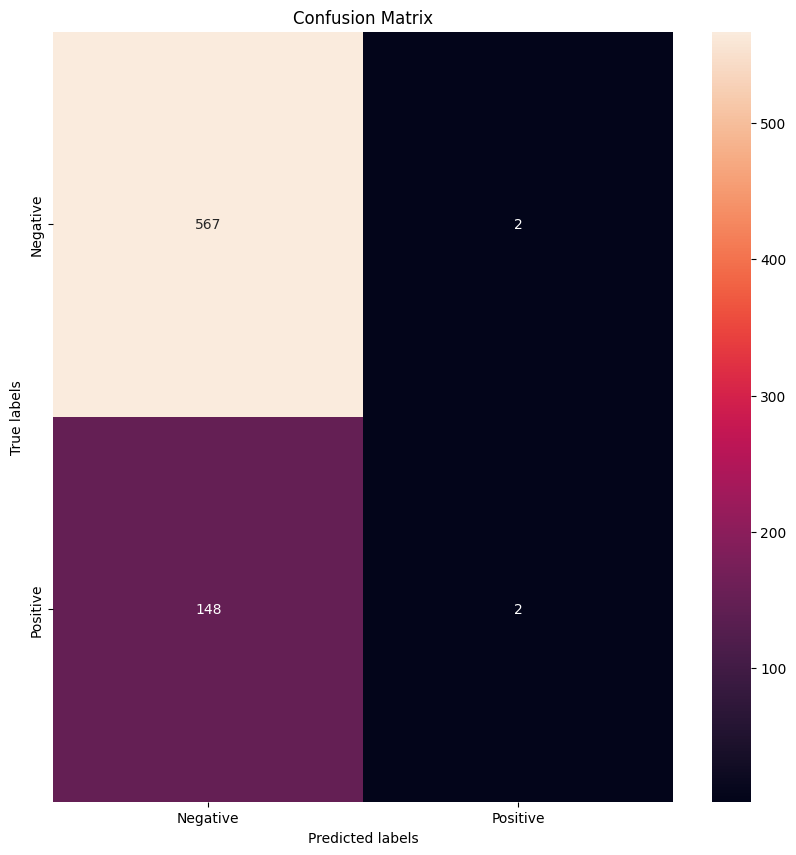

In [19]:
''' Building Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state= 10)
lr_model.fit(XX_train, y_train) # model training 
y_pred = lr_model.predict(XX_test)

# print classification report
evaluation_functions.classification_report_cm(lr_model, XX_test, y_test)

              precision    recall  f1-score   support

    Negative       0.80      0.97      0.87       569
    Positive       0.34      0.07      0.11       150

    accuracy                           0.78       719
   macro avg       0.57      0.52      0.49       719
weighted avg       0.70      0.78      0.71       719



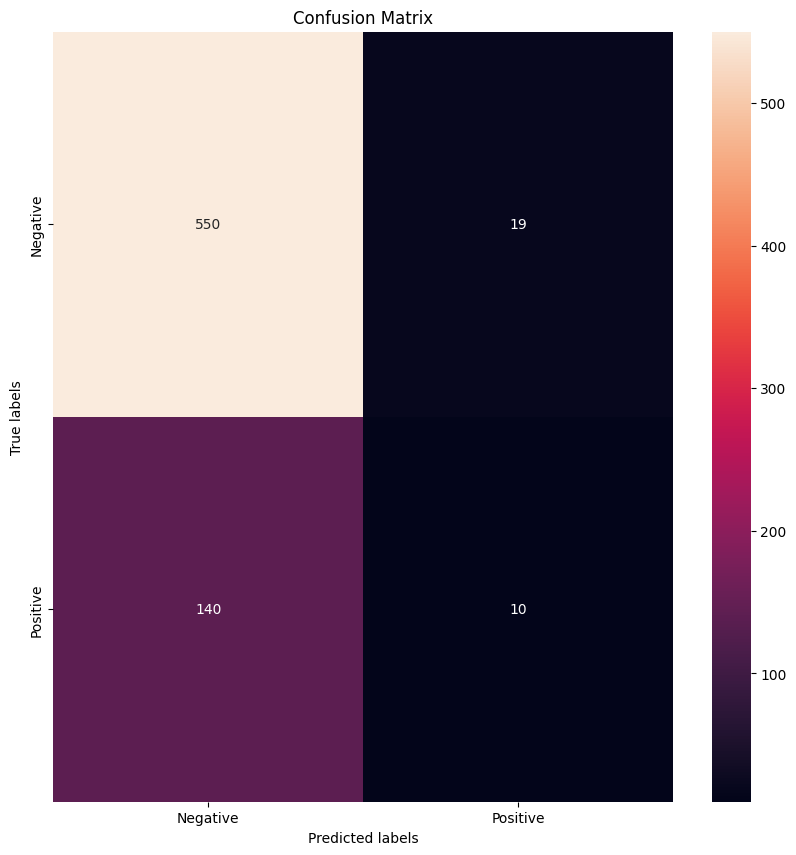

In [20]:
''' Building Suport Vector Machine'''
from sklearn import svm
svm_model = svm.SVC(kernel='linear', probability=True)
svm_model.fit(XX_train, y_train) # model training 
y_pred = svm_model.predict(XX_test)

# print classification report
evaluation_functions.classification_report_cm(svm_model, XX_test, y_test)

In [21]:
tweet = """neom is work for the future"""
tweet_vector = tfidf.transform([tweet])
print(nb_model.predict(tweet_vector))
print()

['n']



              precision    recall  f1-score   support

    Negative       0.92      0.90      0.91       569
    Positive       0.64      0.70      0.67       150

    accuracy                           0.86       719
   macro avg       0.78      0.80      0.79       719
weighted avg       0.86      0.86      0.86       719



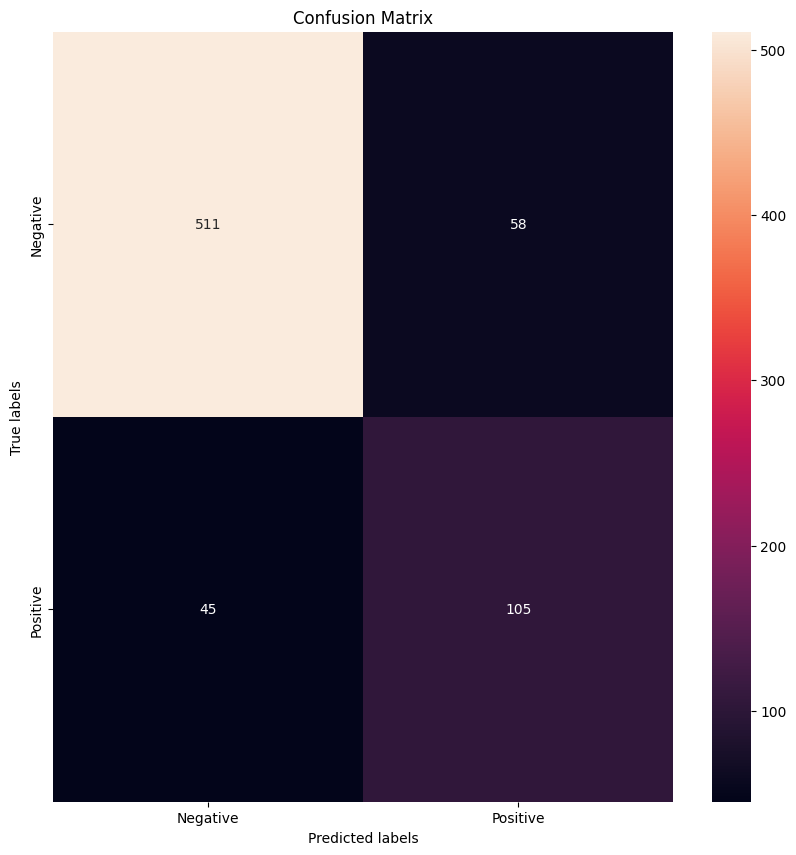

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

nb_with_smote = Pipeline([
    ('vect', TfidfVectorizer(min_df=1)),
    ('smote', SMOTE(random_state=10)),
    ('mmb', MultinomialNB(alpha=0.1))
])
nb_with_smote.fit(X_train, y_train)

# print classification report 
evaluation_functions.classification_report_cm(nb_with_smote, X_test, y_test)


              precision    recall  f1-score   support

    Negative       0.91      0.88      0.90       569
    Positive       0.60      0.69      0.64       150

    accuracy                           0.84       719
   macro avg       0.75      0.78      0.77       719
weighted avg       0.85      0.84      0.84       719



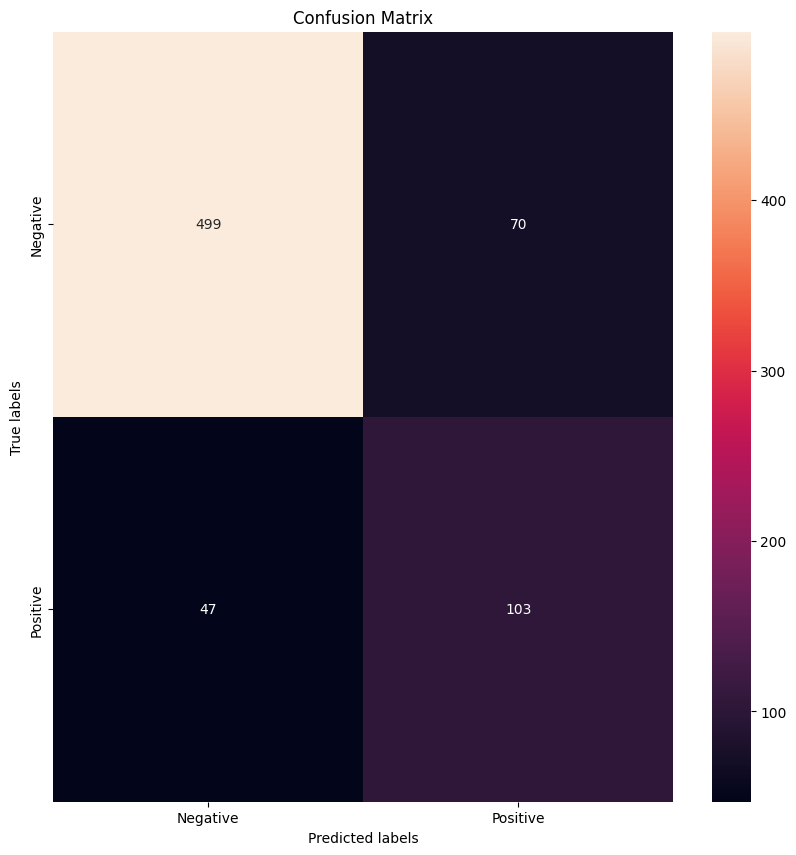

In [23]:
lr_with_smote = Pipeline([
    ('vect', TfidfVectorizer(min_df=1)),
    ('smote', SMOTE(random_state=10)),
    ('lr', LogisticRegression(random_state= 10))
])
lr_with_smote.fit(X_train, y_train)

# print classification report 
evaluation_functions.classification_report_cm(lr_with_smote, X_test, y_test)


              precision    recall  f1-score   support

    Negative       0.92      0.87      0.90       569
    Positive       0.59      0.71      0.65       150

    accuracy                           0.84       719
   macro avg       0.76      0.79      0.77       719
weighted avg       0.85      0.84      0.84       719



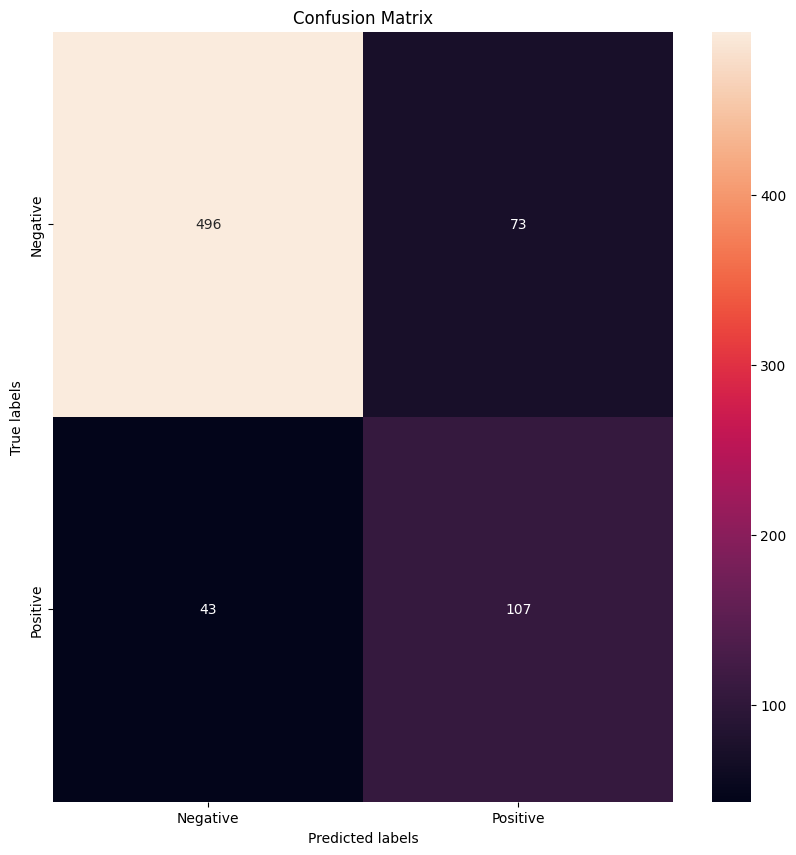

In [24]:
svm_with_smote = Pipeline([
    ('vect', TfidfVectorizer(min_df=1)),
    ('smote', SMOTE(random_state=10)),
    ('svm', svm.SVC(kernel='linear'))
])
svm_with_smote.fit(X_train, y_train)

# print classification report 
evaluation_functions.classification_report_cm(svm_with_smote, X_test, y_test)


In [25]:
tweet1 = """neom is a city for the future"""
tweet2 = """this project is waste of money"""
tweet_vector = tfidf.transform([tweet1])
print(nb_model.predict(tweet_vector))
tweet_vector = tfidf.transform([tweet2])
print(nb_model.predict(tweet_vector))

['n']
['n']


In [26]:
nb_with_smote.predict([tweet1])


array(['p'], dtype='<U1')

In [27]:
nb_with_smote.predict([tweet2])

array(['n'], dtype='<U1')

In [33]:
tweet3 = """well I dont like this project"""
nb_with_smote.predict([tweet3])
#lr_with_smote.predict([tweet3])
#svm_with_smote.predict([tweet3])

array(['n'], dtype='<U1')